In [1]:
import pandas as pd
import numpy as np

In [2]:
pip = pd.read_csv("~/storage/data/physicists/pip-counts-2022-03-04-big.csv", parse_dates=["date"], dtype={"python_version": str})
pip

/tmp/ipykernel_17500/109453501.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  pip = pd.read_csv("~/storage/data/physicists/pip-counts-2022-03-04-big.csv", parse_dates=["date"], dtype={"python_version": str})


,date,os,python_version,project,version,count
0,2019-04-04,Linux,3.5,aghast,0.1,1
1,2019-04-11,Linux,2.7,aghast,0.1,1
2,2019-04-12,Linux,2.7,aghast,0.1,1
3,2019-07-01,Linux,3.4,aghast,0.1,2
4,2019-07-02,Linux,3.5,aghast,0.1,2
...,...,...,...,...,...,...
3159039,2022-03-01,Linux,3.7,zfit,0.9.0a1,4
3159040,2022-03-01,Linux,3.8,zfit,0.9.0a1,2
3159041,2022-03-01,Linux,3.9,zfit,0.9.0a1,2
3159042,2022-03-02,Linux,3.7,zfit,0.9.0a2,4


In [3]:
uproot1 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "1.")].copy()
uproot2 = pip[(pip["project"] == "uproot") & (pip["version"].str[0:2] == "2.")].copy()
uproot3 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "3.")) | ((pip["project"] == "uproot3") & (pip["version"].str[0:2] == "3."))].copy()
uproot4 = pip[((pip["project"] == "uproot") & (pip["version"].str[0:2] == "4.")) | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()
uproot_total = pip[(pip["project"] == "uproot") | (pip["project"] == "uproot3") | ((pip["project"] == "uproot4") & (pip["version"].str[0:2] == "0."))].copy()

uproot1["project"] = "Uproot 1.x"
uproot2["project"] = "Uproot 2.x"
uproot3["project"] = "Uproot 3.x"
uproot4["project"] = "Uproot 4.x"
uproot_total["project"] = "Uproot (all versions)"

In [4]:
awkward0 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "0.")) | ((pip["project"] == "awkward0") & (pip["version"].str[0:2] == "0."))].copy()
awkward1 = pip[((pip["project"] == "awkward") & (pip["version"].str[0:2] == "1.")) | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()
awkward_total = pip[(pip["project"] == "awkward") | (pip["project"] == "awkward0") | ((pip["project"] == "awkward1") & (pip["version"].str[0:2] == "0."))].copy()

awkward0["project"] = "Awkward 0.x"
awkward1["project"] = "Awkward 1.x"
awkward_total["project"] = "Awkward (all versions)"

In [5]:
coffea06 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.6"))].copy()
coffea07 = pip[((pip["project"] == "coffea") & (pip["version"] == "0.7"))].copy()
coffea_total = pip[((pip["project"] == "coffea"))].copy()

coffea06["project"] = "Coffea 0.6.x"
coffea07["project"] = "Coffea 0.7.x"
coffea_total["project"] = "Coffea (all versions)"

In [6]:
pip = pd.concat([pip, uproot1, uproot2, uproot3, uproot4, uproot_total, awkward0, awkward1, awkward_total, coffea06, coffea07, coffea_total])

# Python version of Uproot users

In [7]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "Uproot (all versions)"][["count"]]
pip_bypyversion

count
python_version date             
2.7            2017-09-14      4
3.5            2017-09-14      1
3.4            2017-11-04      2
2.6            2017-12-02      1
3.4            2018-01-20      2
...                          ...
3.7            2022-03-01      1
               2022-03-02      1
3.8            2022-03-03      2
               2022-03-04      1
               2022-03-05      2

[34069 rows x 1 columns]

In [8]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "3.3", "2.7", "2.6"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [9]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.3"] + all_pythons["3.4"] + all_pythons["3.5"]

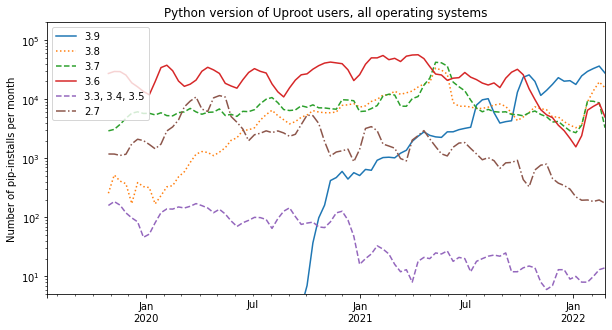

In [10]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2019-07-15"), all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-log.pdf")

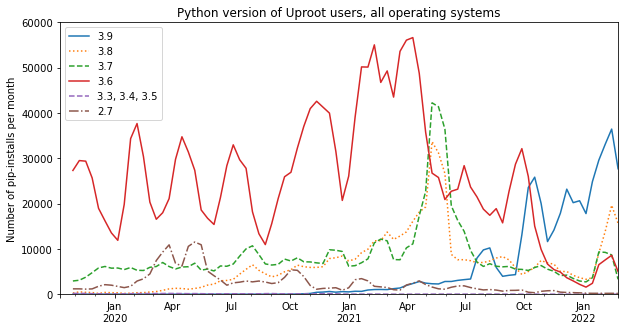

In [11]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 60000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-uprootusers-lin.pdf")

In [12]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[(pip_bypyversion["os"] == "Darwin") | (pip_bypyversion["os"] == "Windows")]
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "Uproot (all versions)"][["count"]]
pip_bypyversion

count
python_version date             
2.7            2017-09-21      1
3.6            2017-09-21      1
2.7            2017-09-25      1
3.6            2017-09-25      1
               2017-09-25      1
...                          ...
3.7            2021-04-28      1
3.8            2021-05-30      1
               2021-06-21      1
3.9            2021-12-30      1
               2022-02-08      1

[14441 rows x 1 columns]

In [13]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "2.7"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [14]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.4"] + all_pythons["3.5"]

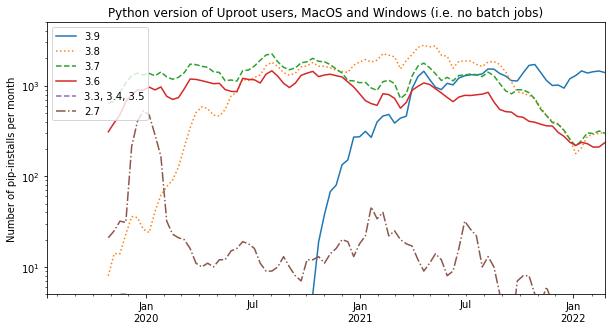

In [15]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(5, 5000)
ax.set_xlim(pd.to_datetime("2019-07-15"), all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-log.pdf")

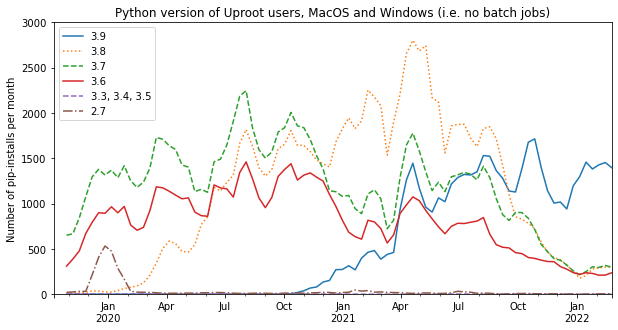

In [16]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 3000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of Uproot users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-uprootusers-lin.pdf")

# Python version of NumPy users

In [17]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "numpy"][["count"]]
pip_bypyversion

,,count
python_version,date,
2.7,2017-04-18,1
3.8,2020-03-21,1
2.7,2016-10-01,20
3.4,2016-10-01,2
3.5,2016-10-01,3
...,...,...
2.7,2022-03-05,1
3.10,2022-03-05,9
3.7,2022-03-05,6


In [18]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "3.3", "2.7", "2.6"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [19]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.3"] + all_pythons["3.4"] + all_pythons["3.5"]

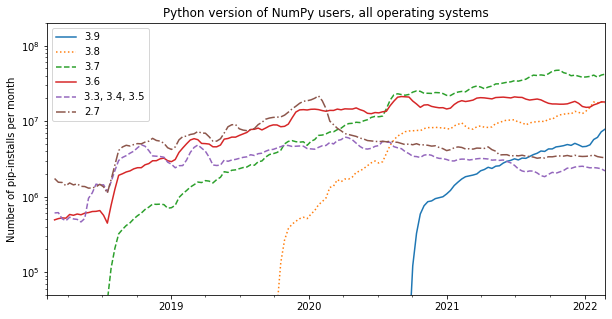

In [20]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(50000, 200000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-log.pdf")

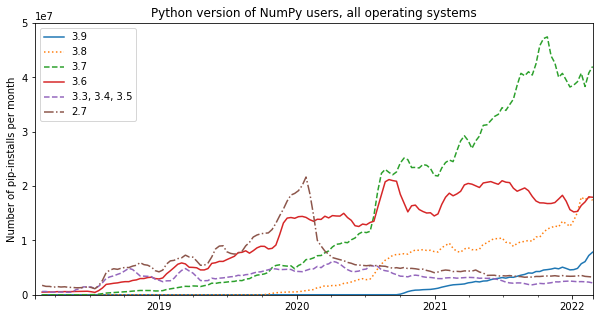

In [21]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 50000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, all operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-allos-pythonversion-numpyusers-lin.pdf")

In [22]:
pip_bypyversion = pip.set_index(["python_version", "date"])
pip_bypyversion = pip_bypyversion[(pip_bypyversion["os"] == "Darwin") | (pip_bypyversion["os"] == "Windows")]
pip_bypyversion = pip_bypyversion[pip_bypyversion["project"] == "numpy"][["count"]]
pip_bypyversion

count
python_version date             
3.8            2020-03-21      1
2.7            2016-10-01     20
3.4            2016-10-01      2
3.5            2016-10-01      3
2.7            2016-10-01     18
...                          ...
               2022-03-05      1
3.10           2022-03-05      9
3.7            2022-03-05      6
3.8            2022-03-05      1
3.9            2022-03-05      5

[238790 rows x 1 columns]

In [23]:
pythons = pip_bypyversion.index.levels[0].tolist()
by_python = {}
for python in ["3.11", "3.10", "3.9", "3.8", "3.7", "3.6", "3.5", "3.4", "2.7"]:
    tmp = pip_bypyversion.loc[python]
    by_python[python] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_pythons = pd.DataFrame(by_python, index=by_python["3.8"].index).fillna(0)

In [24]:
all_pythons["3.3, 3.4, 3.5"] = all_pythons["3.4"] + all_pythons["3.5"]

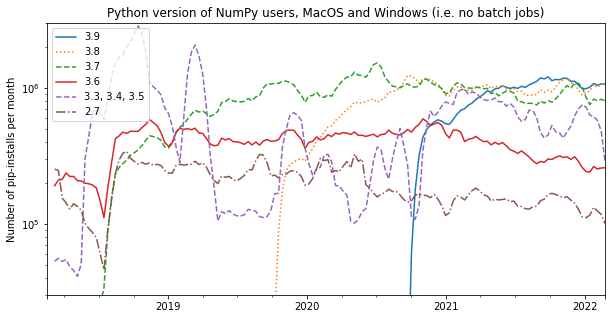

In [25]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=True, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(30000, 3000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-log.pdf")

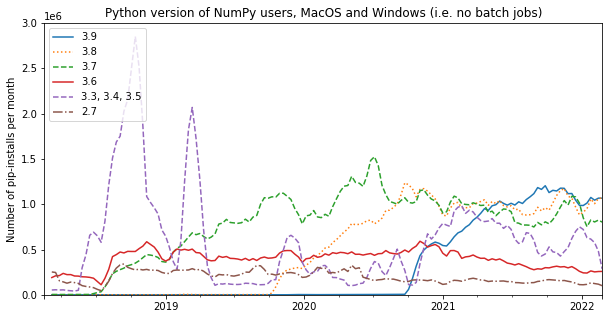

In [26]:
ax = all_pythons[[
    "3.9", "3.8", "3.7", "3.6", "3.3, 3.4, 3.5", "2.7"
]].rolling(3).sum().plot(logy=False, style=["-", ":", "--", "-", "--", "-."], figsize=(10, 5))
ax.set_ylim(0, 3000000)
ax.set_xlim(all_pythons.index[0], all_pythons.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("Python version of NumPy users, MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-lin.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-pythonversion-numpyusers-lin.pdf")

# Uproot, Awkward, and Coffea packages

In [27]:
pip.set_index(["project", "date"], inplace=True)
pip

os python_version   version  count
project               date                                             
aghast                2019-04-04  Linux            3.5       0.1      1
                      2019-04-11  Linux            2.7       0.1      1
                      2019-04-12  Linux            2.7       0.1      1
                      2019-07-01  Linux            3.4       0.1      2
                      2019-07-02  Linux            3.5       0.1      2
...                                 ...            ...       ...    ...
Coffea (all versions) 2021-10-23  Linux            3.7  0.7.0rc1      1
                      2021-10-26  Linux            3.7  0.7.0rc1      1
                      2021-10-27  Linux            3.7  0.7.0rc1      2
                      2021-10-29  Linux            3.7  0.7.0rc1      4
                      2021-11-27  Linux            3.7  0.7.0rc1      1

[3306657 rows x 4 columns]

In [28]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)

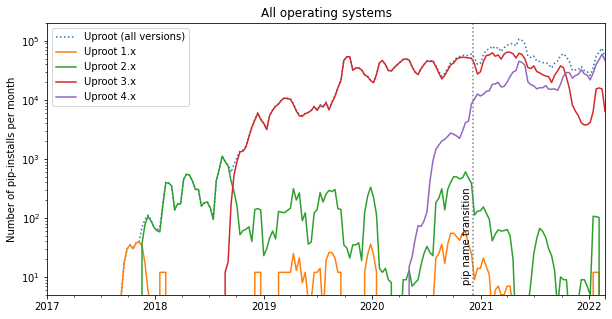

In [29]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 50, "pip name transition", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-uproot-log.pdf")

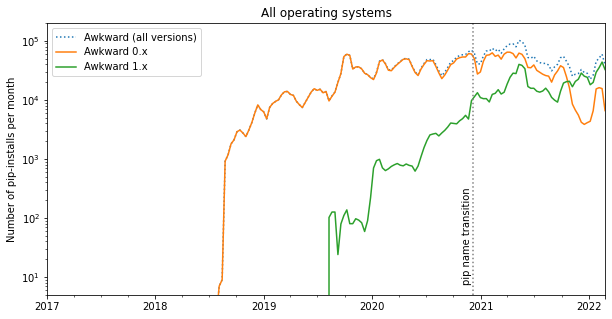

In [30]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 50, "pip name transition", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-awkward-log.pdf")

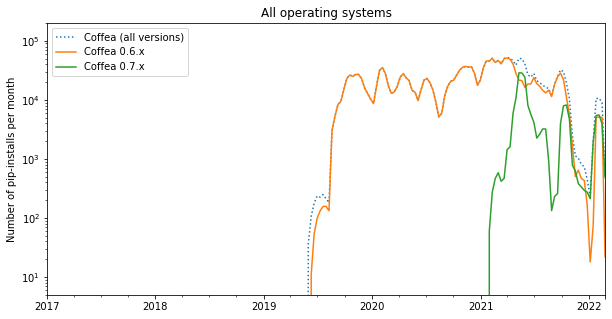

In [31]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 200000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("All operating systems")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-log.svg")
ax.get_figure().savefig("PLOTS/pip-allos-coffea-log.pdf")

In [33]:
pip = pip[(pip["os"] == "Darwin") | (pip["os"] == "Windows")]

In [34]:
packages = pip.index.levels[0].tolist()
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)

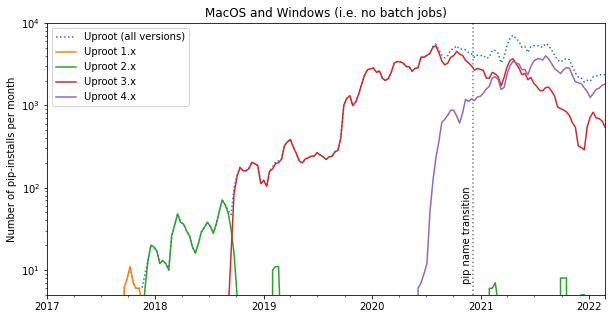

In [35]:
ax = all_packages[[
    "Uproot (all versions)", "Uproot 1.x", "Uproot 2.x", "Uproot 3.x", "Uproot 4.x"
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 27, "pip name transition", rotation=90, va="center")
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-uproot-log.pdf")

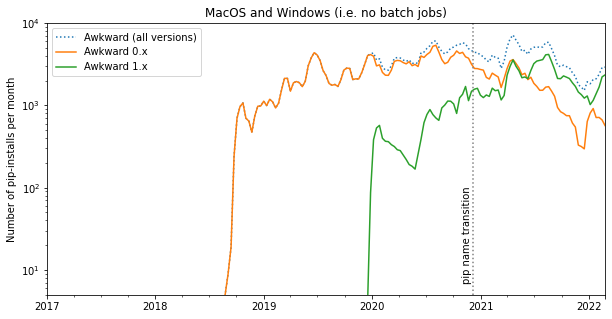

In [36]:
ax = all_packages[[
    "Awkward (all versions)", "Awkward 0.x", "Awkward 1.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 10000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.axvline(pd.to_datetime("2020-12-05"), ls=":", c="gray")
ax.legend(loc="upper left")
ax.text(pd.to_datetime("2020-12-05") - pd.to_timedelta("35 days"), 27, "pip name transition", rotation=90, va="center")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-awkward-log.pdf")

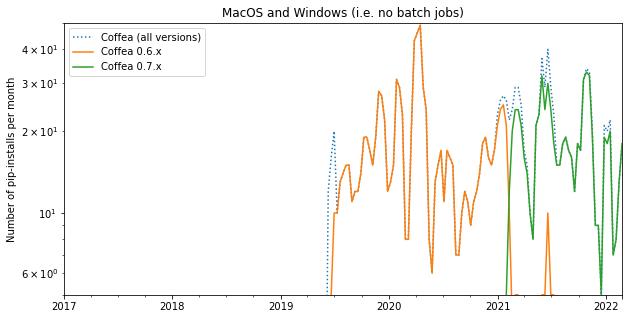

In [37]:
ax = all_packages[[
    "Coffea (all versions)", "Coffea 0.6.x", "Coffea 0.7.x",
]].rolling(3).sum().plot(logy=True, style=[":", "-", "-"], figsize=(10, 5))
ax.set_ylim(5, 50)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")
ax.set_title("MacOS and Windows (i.e. no batch jobs)")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-log.svg")
ax.get_figure().savefig("PLOTS/pip-macwin-coffea-log.pdf")